In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/vanilla_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 110s 8ms/step


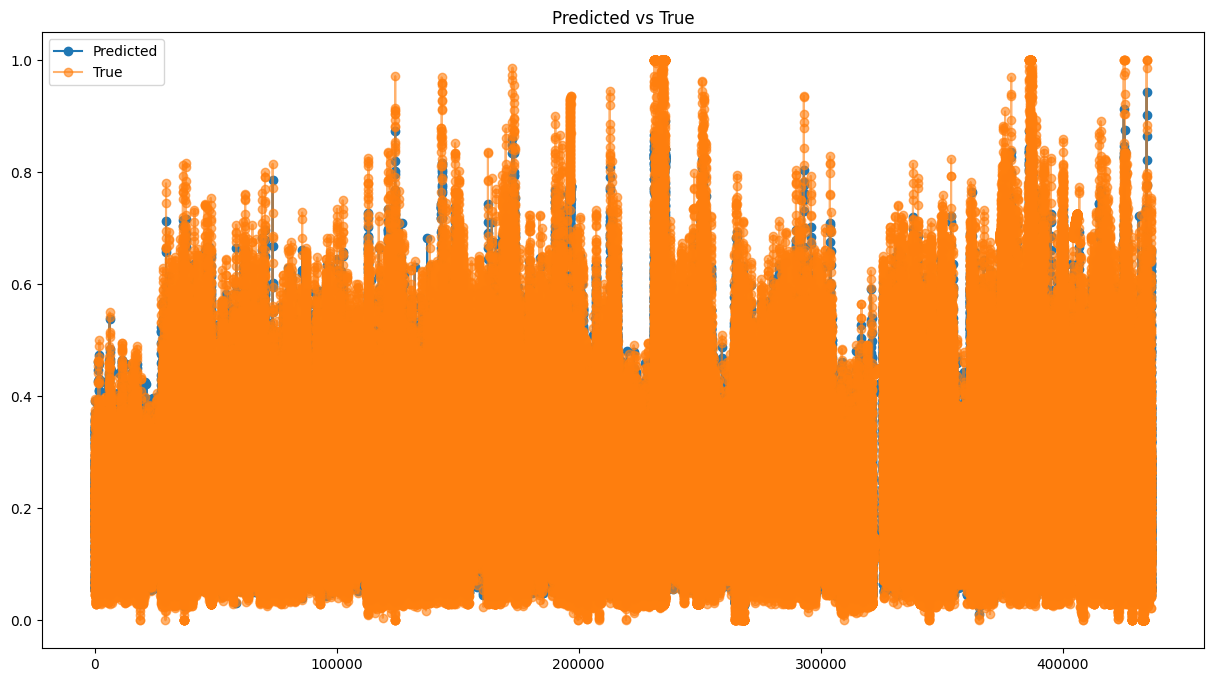

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029230874533263937,
 'mse': 0.04168404528406171,
 'rmse': 0.0017375596312437071}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          144.957474
1          142.869125
2          141.526245
3          141.248856
4          139.495300
...               ...
436585      88.558228
436586     131.881851
436587     164.915634
436588     207.036072
436589     203.357803

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  144.957474
2023-01-01 00:15:00   140.0  142.869125
2023-01-01 00:30:00   139.0  141.526245
2023-01-01 00:45:00   145.0  141.248856
2023-01-01 01:00:00   159.0  139.495300
...                     ...         ...
2035-06-14 18:15:00   137.0   88.558228
2035-06-14 18:30:00   177.0  131.881851
2035-06-14 18:45:00   198.0  164.915634
2035-06-14 19:00:00   216.0  207.036072
2035-06-14 19:15:00   233.0  203.357803

[436590 rows x 2 columns]

AP, BE, EP: (0.9293935486235338, 0.05257118250803387, 0.018035268868432323)


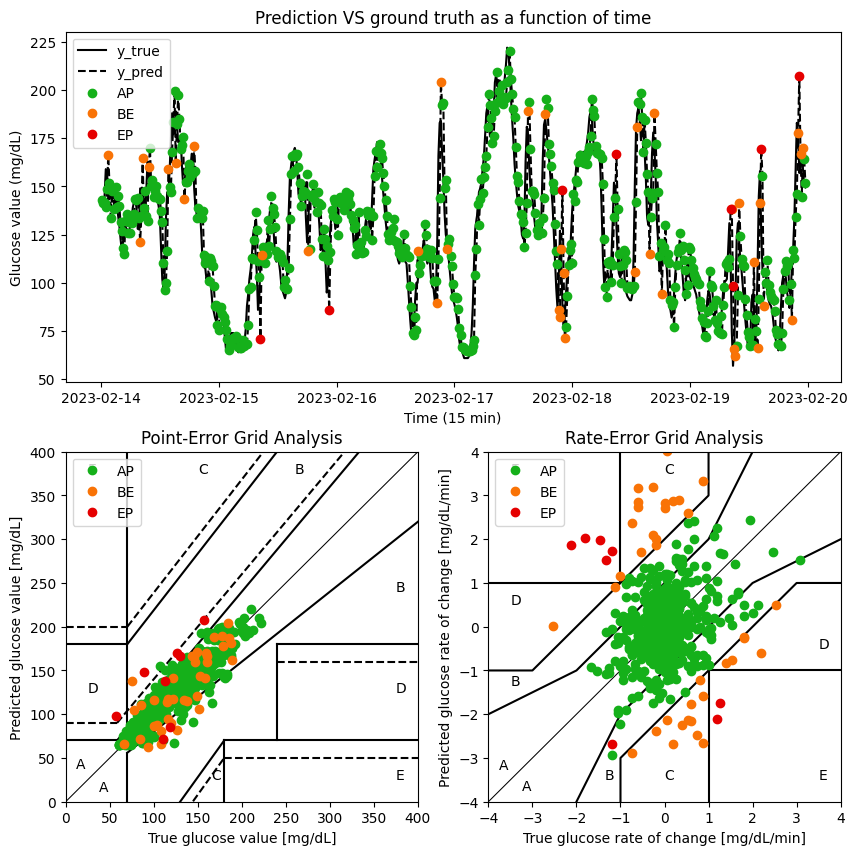

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  144.957474       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  142.869125 -0.066667 -0.139223     AP   
2      2023-02-14 00:30:00   139.0  141.526245 -0.066667 -0.089525     AP   
3      2023-02-14 00:45:00   145.0  141.248856  0.400000 -0.018493     AP   
4      2023-02-14 01:00:00   159.0  139.495300  0.933333 -0.116904     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   88.558228  2.333333  0.024220     BE   
436586 2035-07-28 18:30:00   177.0  131.881851  2.666667  2.888242     AP   
436587 2035-07-28 18:45:00   198.0  164.915634  1.400000  2.202252     AP   
436588 2035-07-28 19:00:00   216.0  207.036072  1.200000  2.808029     AP   
436589 2035-07-28 19:15:00   233.0  203.357803  1.133333 -0.245218     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 28ms/step


Glucose level Predict  Glucose level True
0               0.228168            0.219565
1               0.223629            0.217391

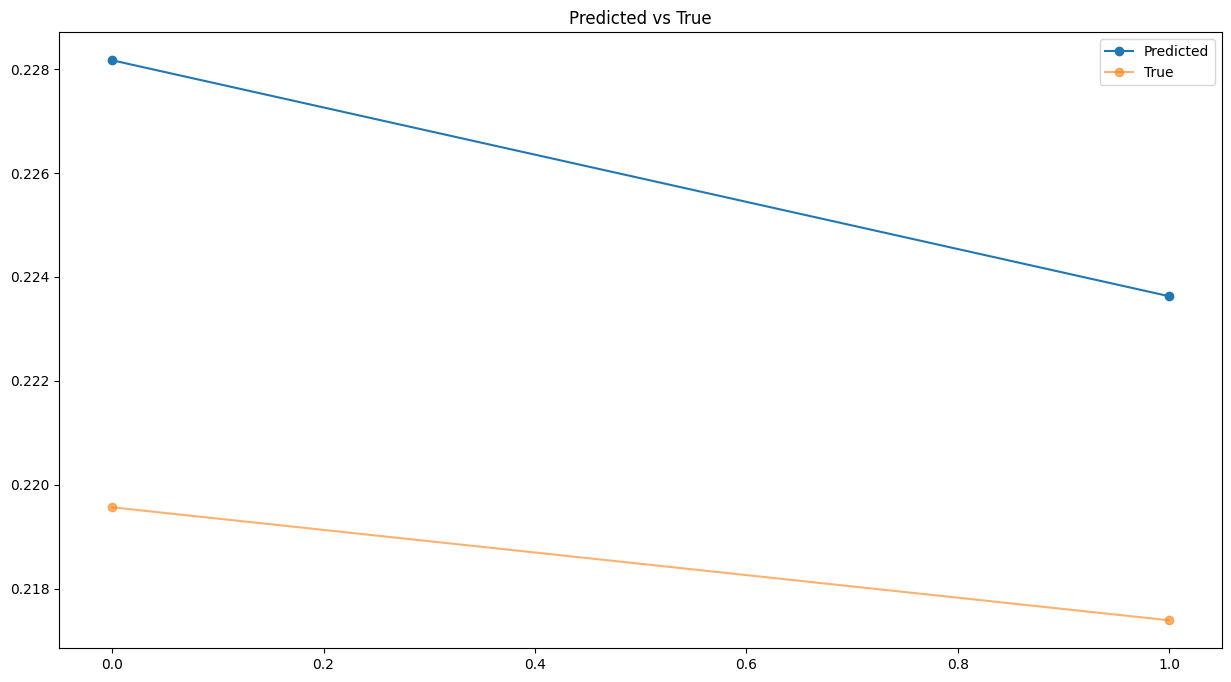

{'mae': 0.007420228486475722,
 'mse': 0.007513938555562755,
 'rmse': 5.6459272616772496e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             144.957474               141.0
1             142.869125               140.0

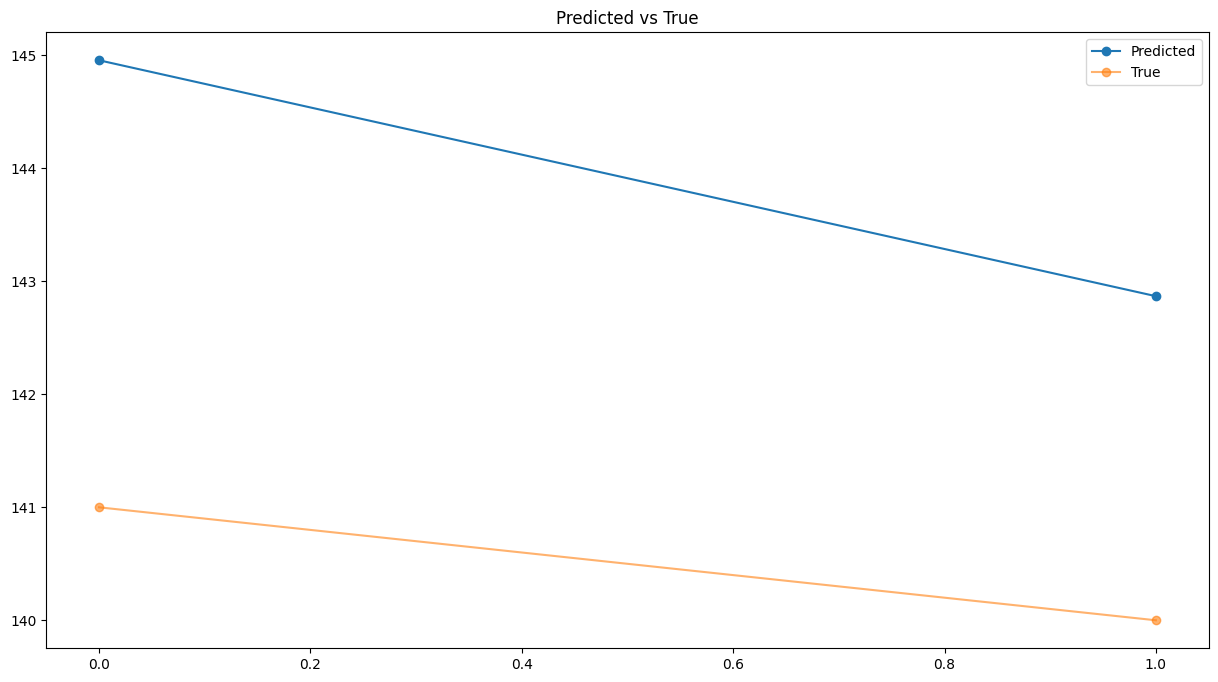

{'mae': 3.413299560546875,
 'mse': 3.4564055670321236,
 'rmse': 11.946739443810657}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 25ms/step


Glucose level Predict  Glucose level True
0               0.228168            0.219565
1               0.229533            0.217391

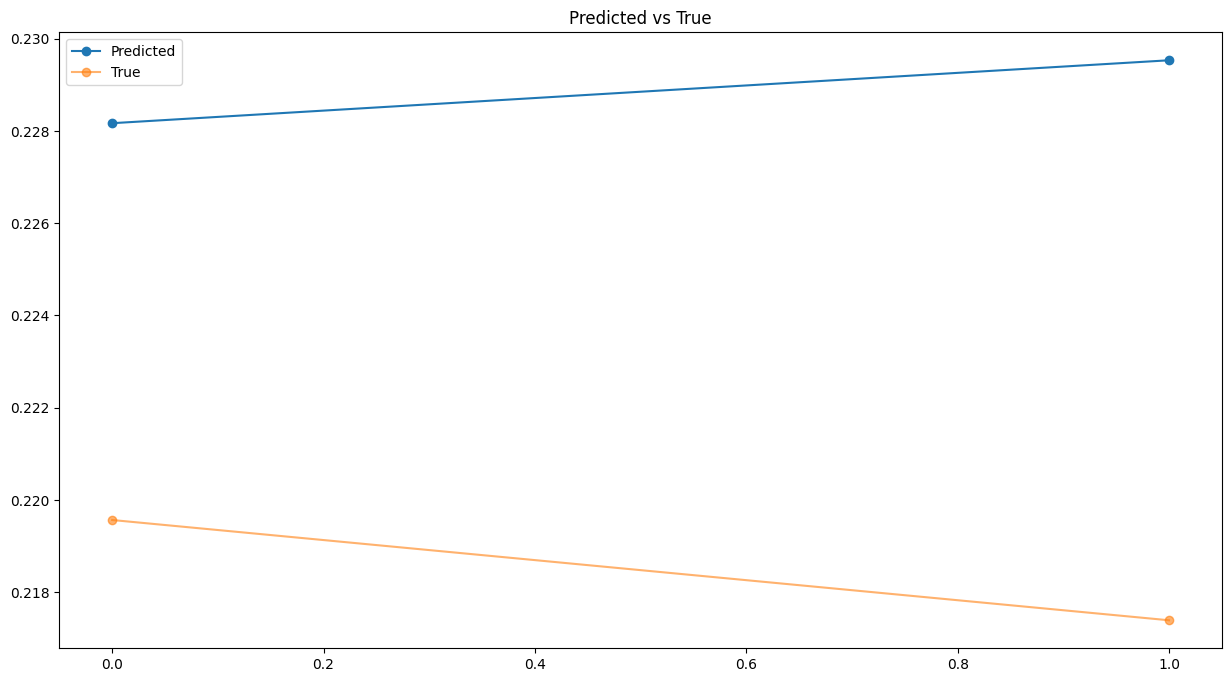

{'mae': 0.010372215574202315,
 'mse': 0.01052198564734605,
 'rmse': 0.00011071218196295628}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             144.957474               141.0
1             145.584961               140.0

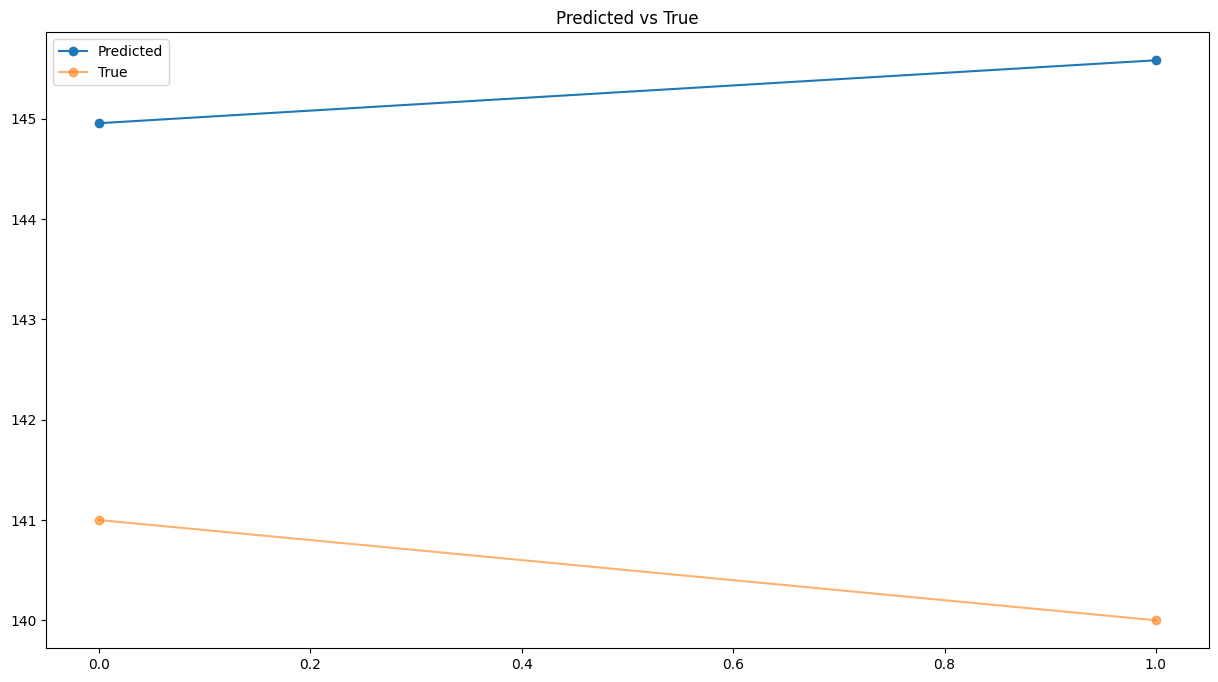

{'mae': 4.771217346191406,
 'mse': 4.8401129735775354,
 'rmse': 23.426693596993573}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.257148            0.182609
1               0.230063            0.154348
2               0.145272            0.152174
3               0.159887            0.150000
4               0.156288            0.123913

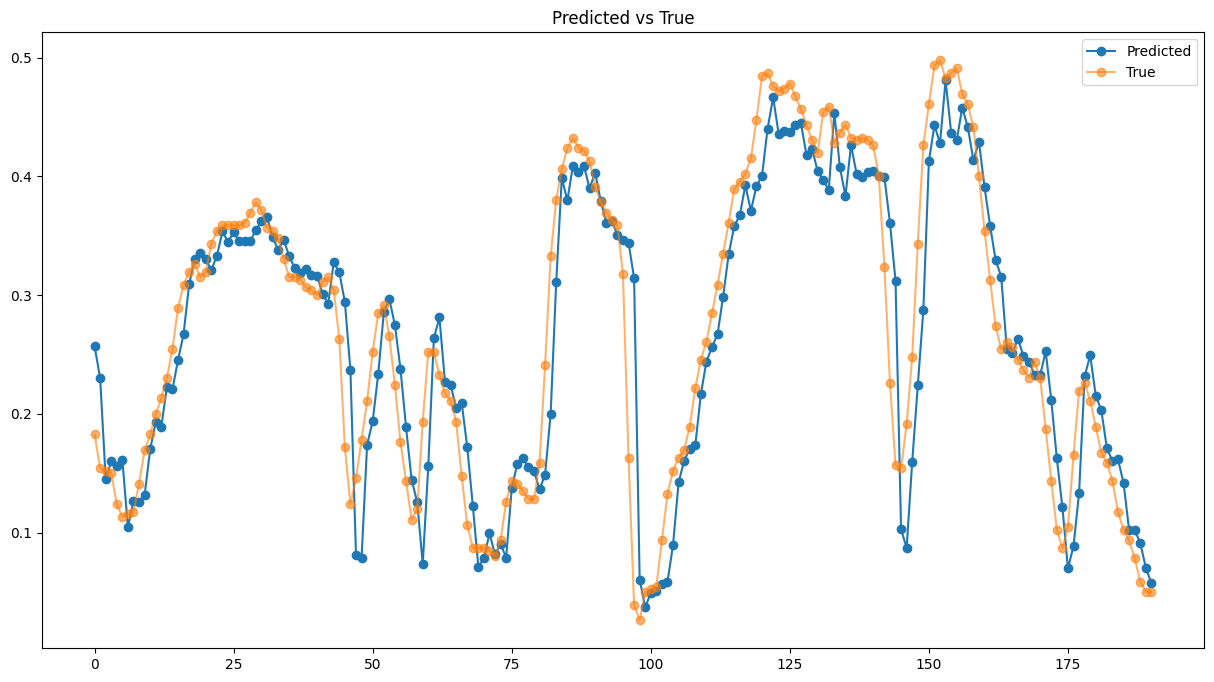

{'mae': 0.03631403151294948,
 'mse': 0.05150329549445391,
 'rmse': 0.0026525894467890367}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

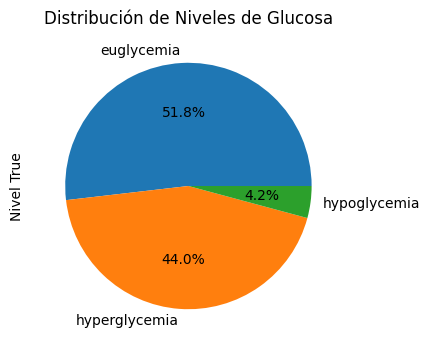

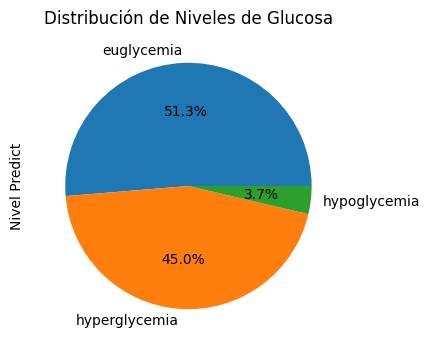

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             158.287918    euglycemia
1               111.0  euglycemia             145.829010    euglycemia
2               110.0  euglycemia             106.825012    euglycemia
3               109.0  euglycemia             113.547981    euglycemia
4                97.0  euglycemia             111.892670    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


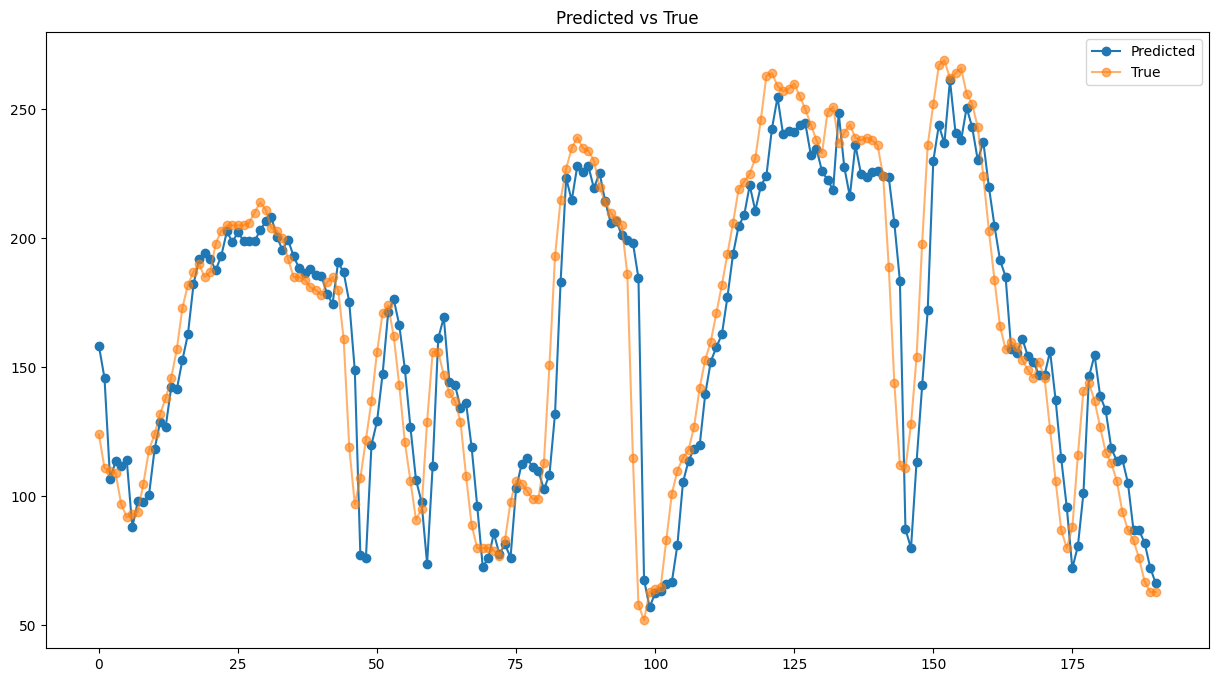

{'mae': 16.70445447192766,
 'mse': 23.691516238271632,
 'rmse': 561.2879416682883}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  158.287918
2023-01-01 00:15:00   111.0  145.829010
2023-01-01 00:30:00   110.0  106.825012
2023-01-01 00:45:00   109.0  113.547981
2023-01-01 01:00:00    97.0  111.892670
...                     ...         ...
2023-01-02 22:30:00    83.0   86.889641
2023-01-02 22:45:00    76.0   86.926956
2023-01-02 23:00:00    67.0   81.967186
2023-01-02 23:15:00    63.0   72.399307
2023-01-02 23:30:00    63.0   66.291214

[191 rows x 2 columns]

AP, BE, EP: (0.9105263157894737, 0.07368421052631578, 0.015789473684210527)


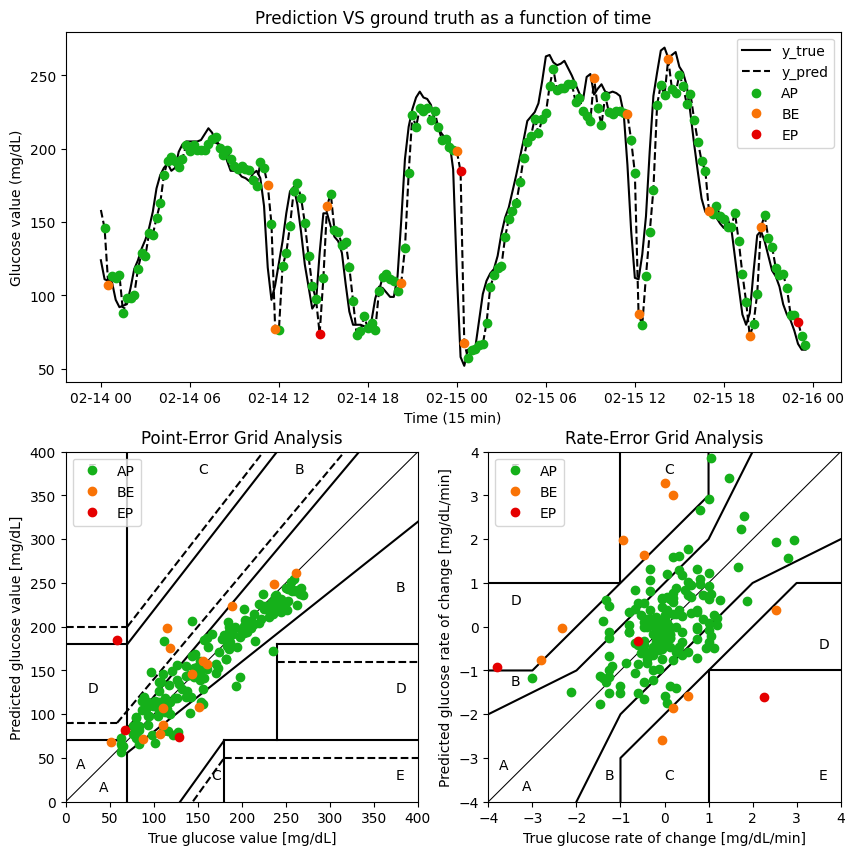

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 4ms/step


Glucose level Predict  Glucose level True
0               0.326745            0.373913
1               0.361552            0.400000
2               0.373306            0.404348
3               0.399754            0.406522
4               0.374978            0.397826

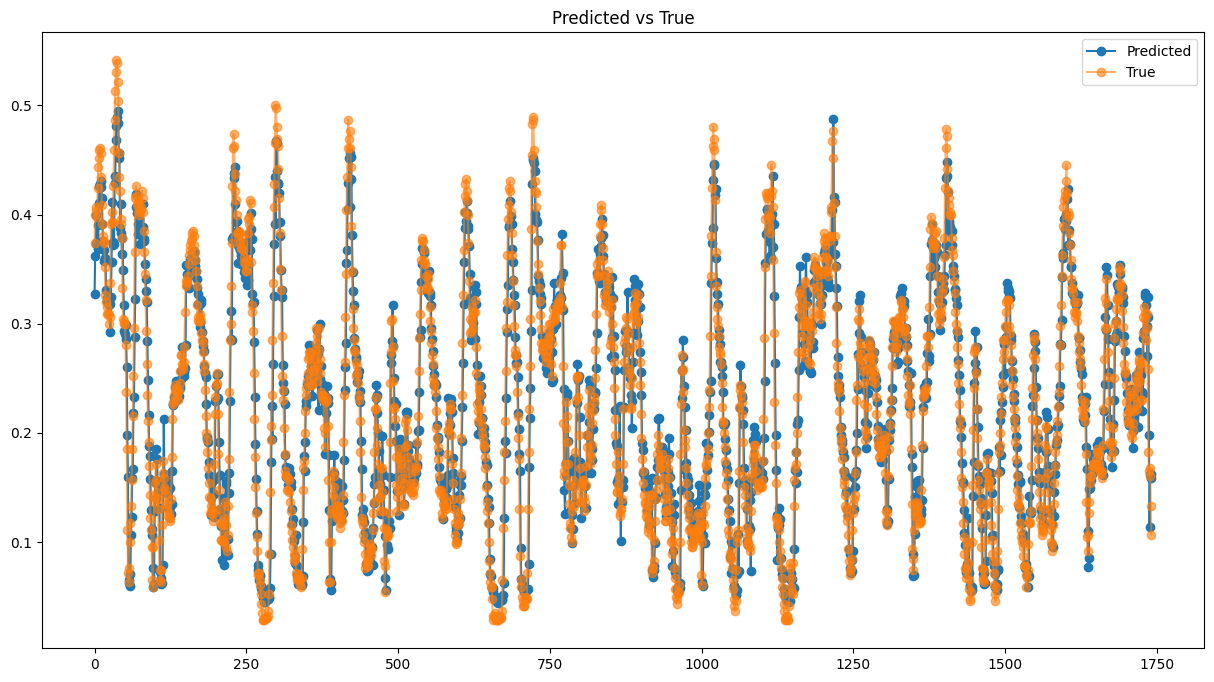

{'mae': 0.022967179749626455,
 'mse': 0.02998608648691033,
 'rmse': 0.0008991653828004663}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

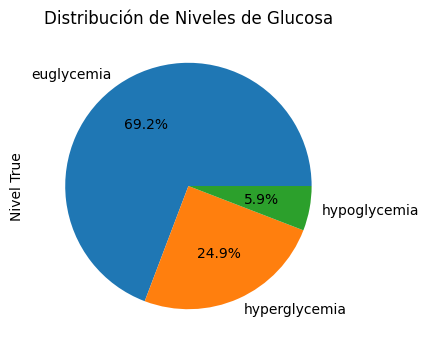

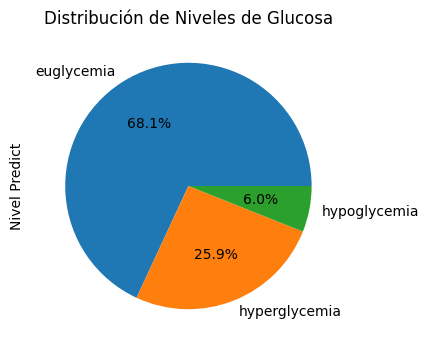

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             190.302917  hyperglycemia
1               224.0  hyperglycemia             206.313843  hyperglycemia
2               226.0  hyperglycemia             211.720947  hyperglycemia
3               227.0  hyperglycemia             223.886948  hyperglycemia
4               223.0  hyperglycemia             212.490021  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


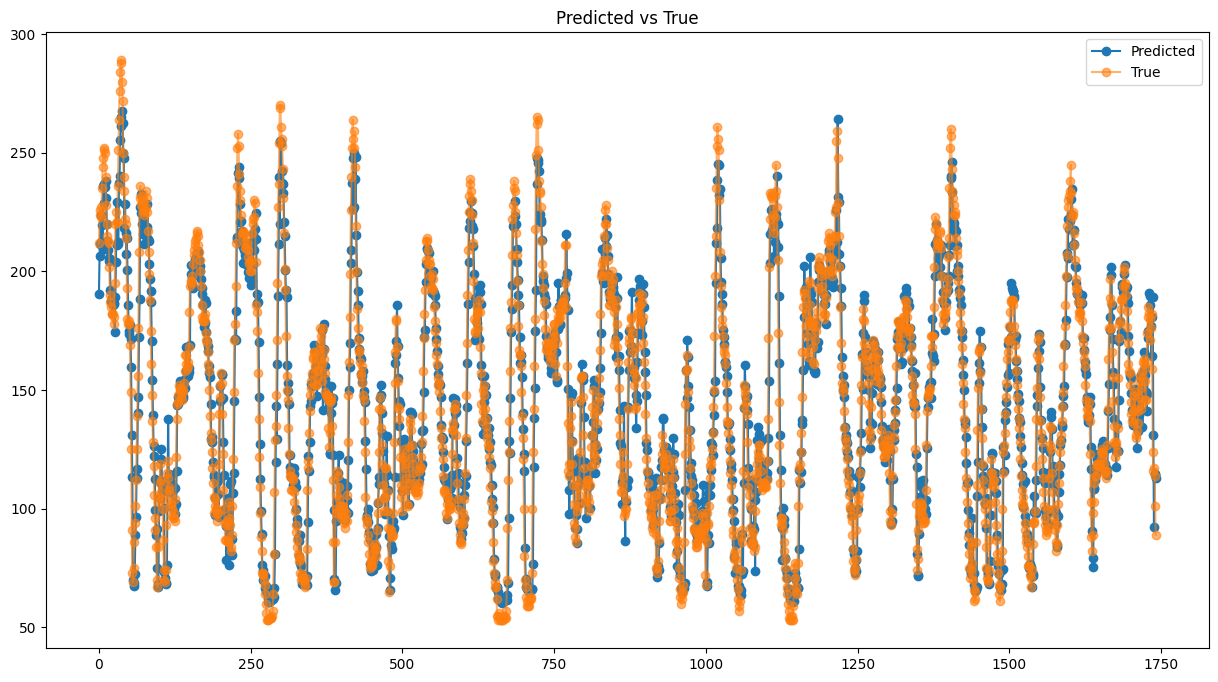

{'mae': 10.564902573420177,
 'mse': 13.793599814384743,
 'rmse': 190.26339583939483}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  190.302917
2023-01-01 00:15:00   224.0  206.313843
2023-01-01 00:30:00   226.0  211.720947
2023-01-01 00:45:00   227.0  223.886948
2023-01-01 01:00:00   223.0  212.490021
...                     ...         ...
2023-01-19 02:15:00   116.0  130.949936
2023-01-19 02:30:00   117.0   92.327576
2023-01-19 02:45:00   114.0  114.852501
2023-01-19 03:00:00   101.0  114.566147
2023-01-19 03:15:00    89.0  112.839012

[1742 rows x 2 columns]

AP, BE, EP: (0.9712808730614589, 0.022400919012062034, 0.006318207926479035)


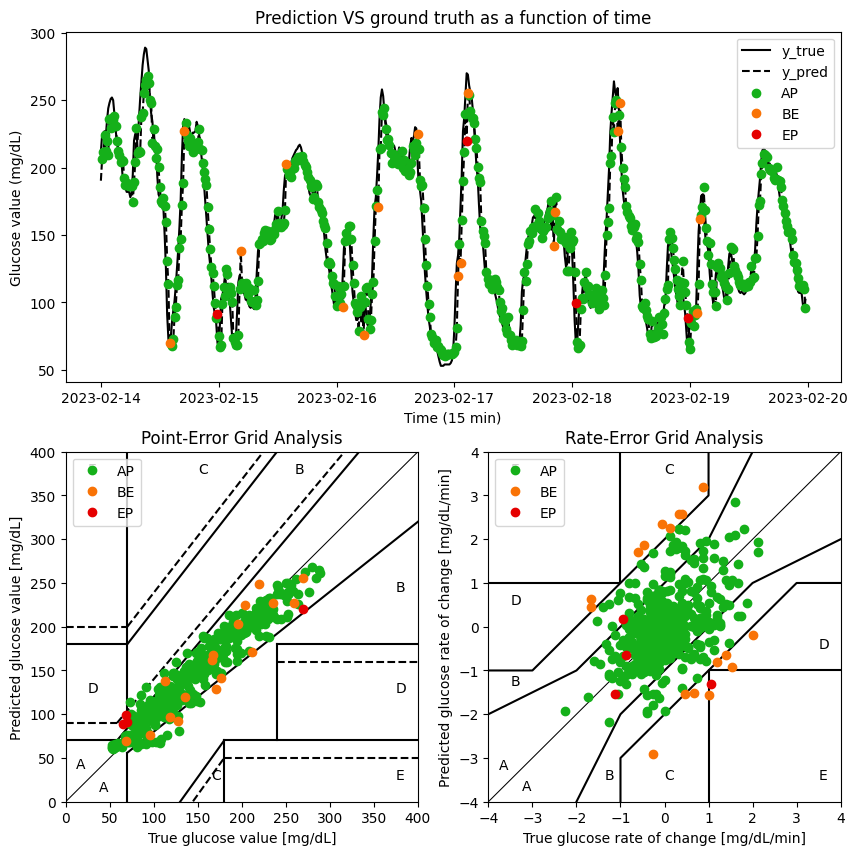

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 0s 4ms/step


Glucose level Predict  Glucose level True
0               0.320214            0.261858
1               0.276278            0.229051
2               0.250187            0.196245
3               0.199622            0.163439
4               0.171529            0.130632

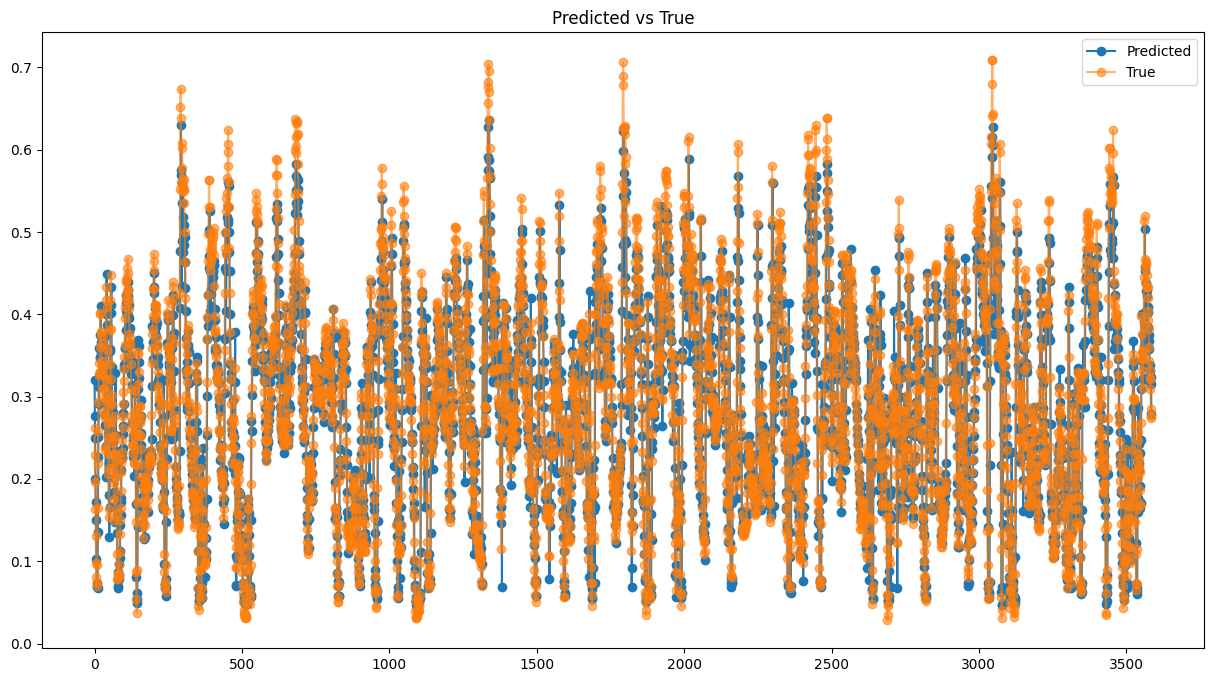

{'mae': 0.03608565697043894,
 'mse': 0.050227034452233046,
 'rmse': 0.002522754989865805}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

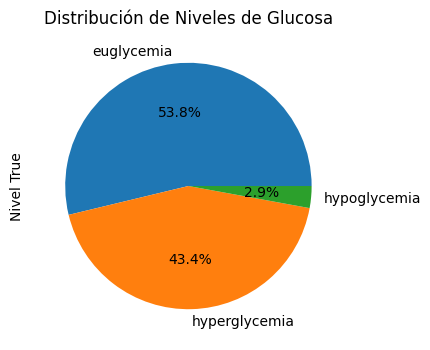

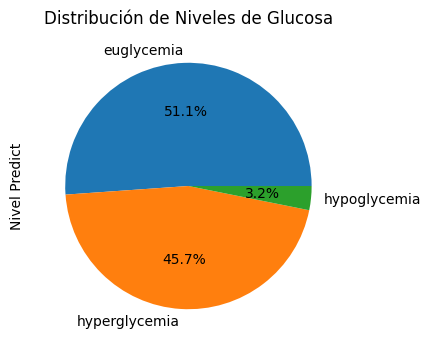

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             187.298569  hyperglycemia
1          145.363636  euglycemia             167.088120     euglycemia
2          130.272727  euglycemia             155.085815     euglycemia
3          115.181818  euglycemia             131.825974     euglycemia
4          100.090909  euglycemia             118.903191     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


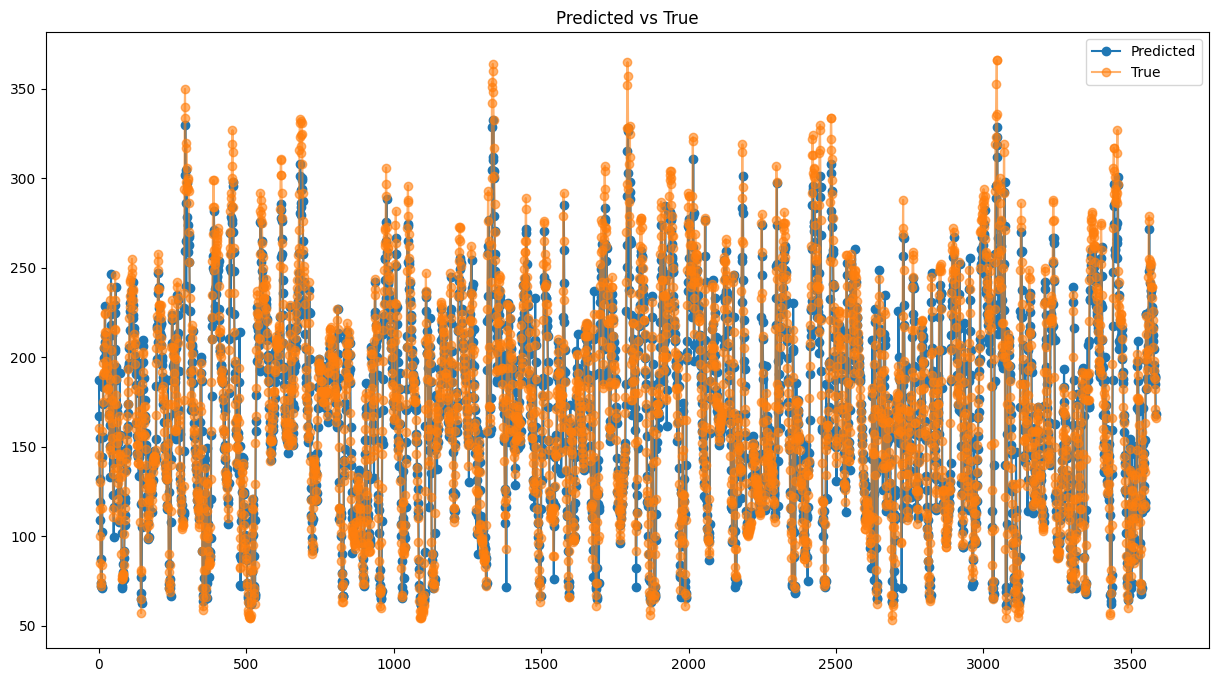

{'mae': 16.59940292619531,
 'mse': 23.104436580326144,
 'rmse': 533.8149896943128}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  187.298569
2023-01-01 00:15:00  145.363636  167.088120
2023-01-01 00:30:00  130.272727  155.085815
2023-01-01 00:45:00  115.181818  131.825974
2023-01-01 01:00:00  100.090909  118.903191
...                         ...         ...
2023-02-07 07:15:00  188.000000  189.742218
2023-02-07 07:30:00  182.000000  188.222183
2023-02-07 07:45:00  171.000000  189.108475
2023-02-07 08:00:00  167.000000  185.040802
2023-02-07 08:15:00  166.000000  168.475082

[3586 rows x 2 columns]

AP, BE, EP: (0.8898186889818689, 0.0806136680613668, 0.029567642956764294)


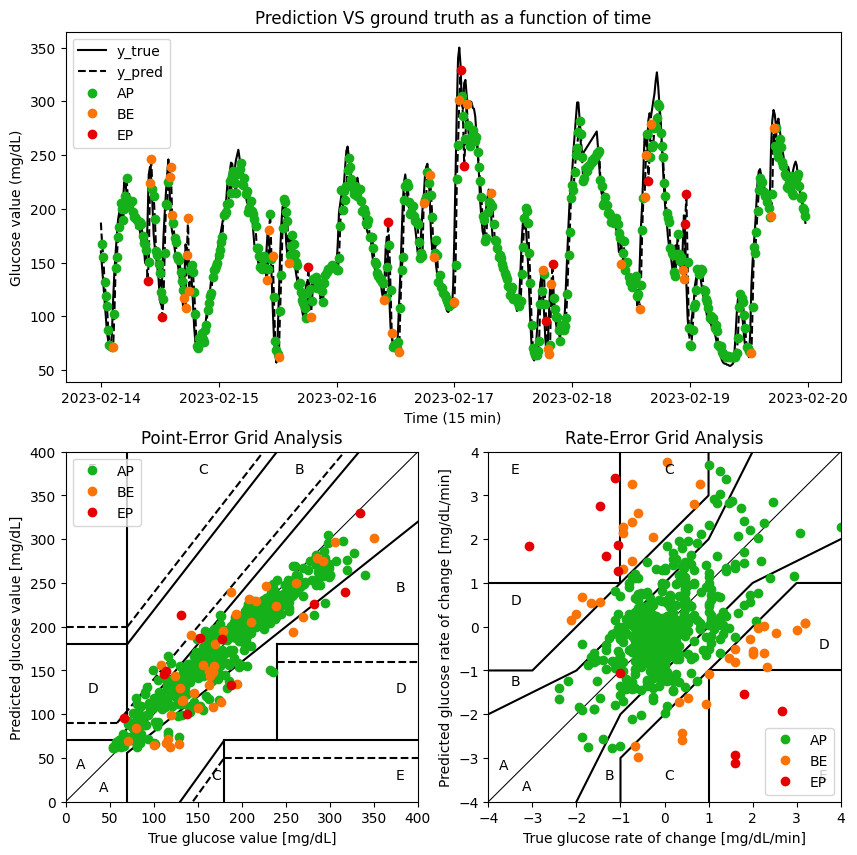

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 4ms/step


Glucose level Predict  Glucose level True
0               0.486203            0.534783
1               0.491928            0.500000
2               0.478782            0.484783
3               0.425400            0.463043
4               0.447565            0.428261

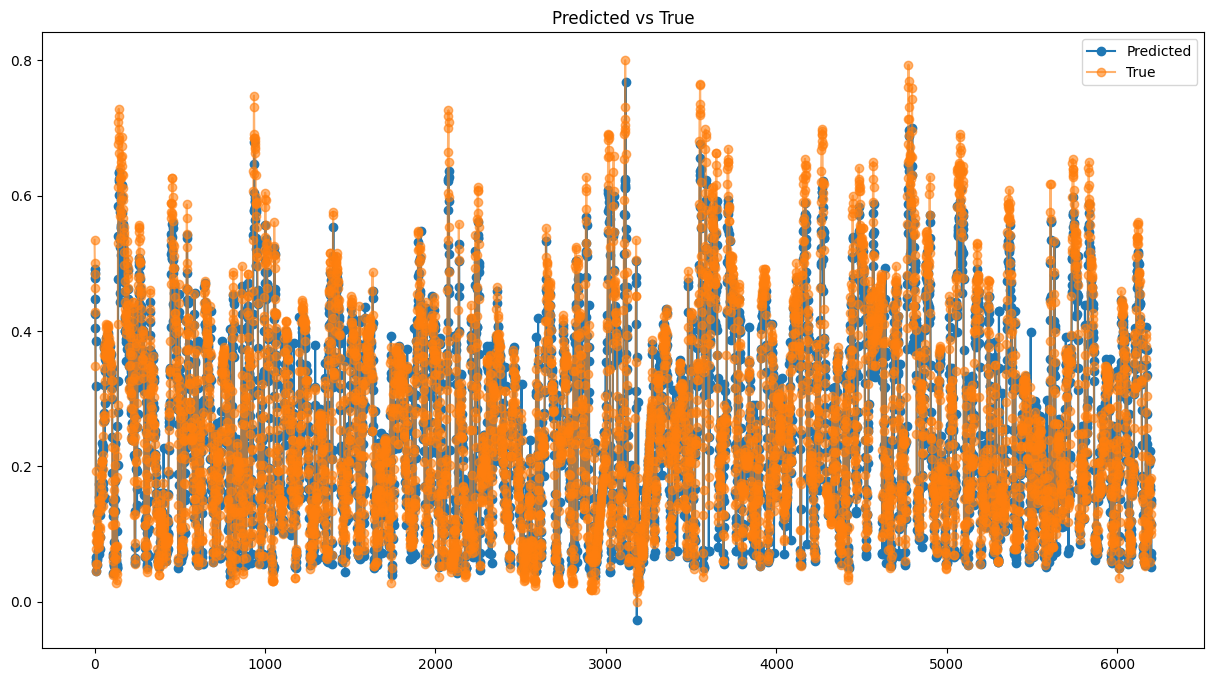

{'mae': 0.04068226829093997,
 'mse': 0.056452042068244924,
 'rmse': 0.0031868330536748944}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

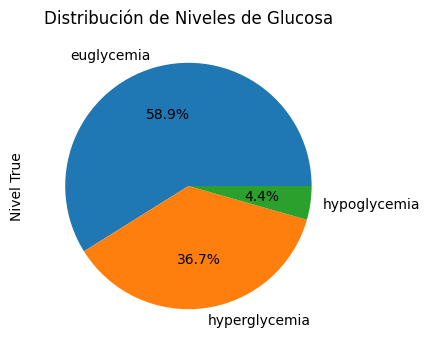

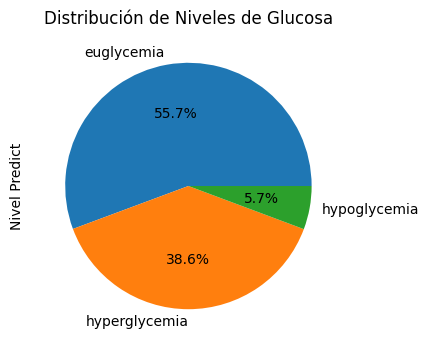

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             263.653564  hyperglycemia
1               270.0  hyperglycemia             266.286743  hyperglycemia
2               263.0  hyperglycemia             260.239502  hyperglycemia
3               253.0  hyperglycemia             235.684189  hyperglycemia
4               237.0  hyperglycemia             245.879929  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


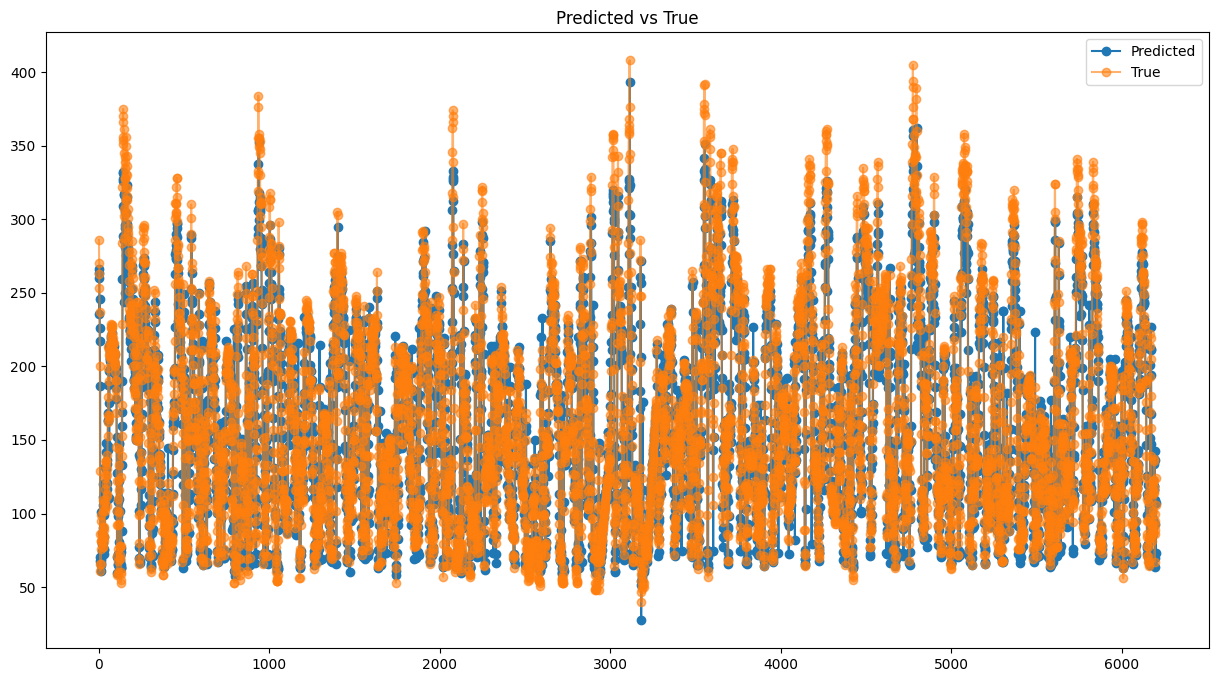

{'mae': 18.713844266190335,
 'mse': 25.967940488292335,
 'rmse': 674.3339332034923}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  263.653564
2023-01-01 00:15:00   270.0  266.286743
2023-01-01 00:30:00   263.0  260.239502
2023-01-01 00:45:00   253.0  235.684189
2023-01-01 01:00:00   237.0  245.879929
...                     ...         ...
2023-03-06 13:00:00   100.0   63.495148
2023-03-06 13:15:00    89.0  109.121361
2023-03-06 13:30:00    92.0   93.166206
2023-03-06 13:45:00   106.0   73.212021
2023-03-06 14:00:00   124.0  107.481026

[6201 rows x 2 columns]

AP, BE, EP: (0.8559677419354839, 0.10193548387096774, 0.04209677419354839)


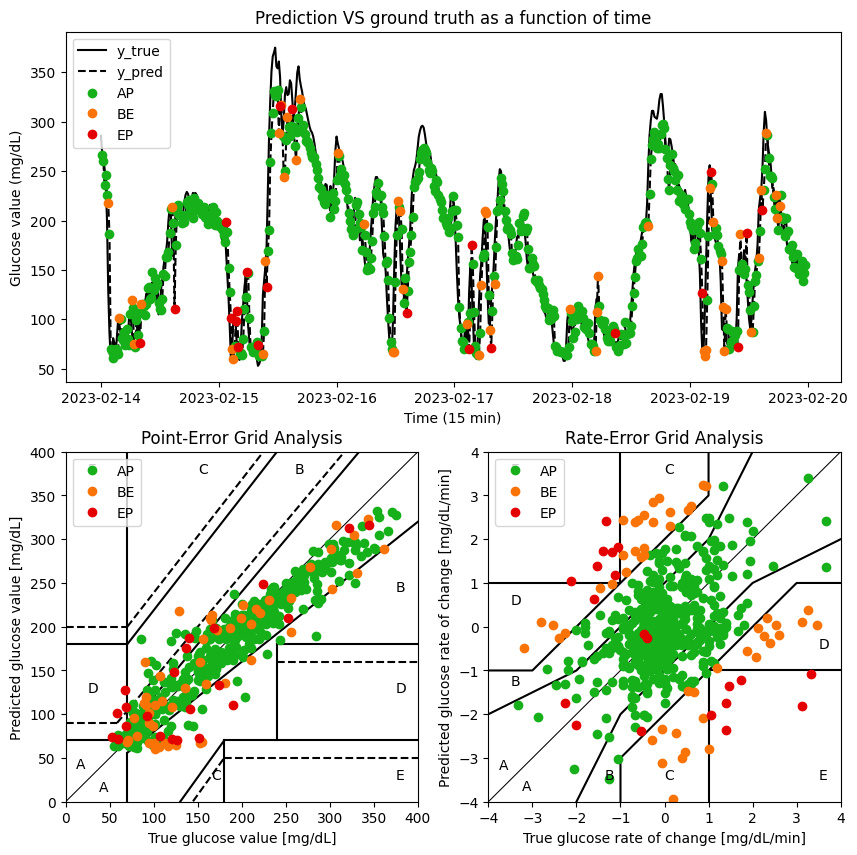

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)